In [1]:
import numpy as np
import scipy
import scipy.signal

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# run cell for interactive plots
import mpld3
mpld3.enable_notebook()

In [2]:
# measured kistler sensor data
# (motor drive commanded torque, adcsample_t)
data = np.reshape(
    np.array([
        -4.0, 2236,
        -3.0, 2189,
        -2.0, 2142,
        -1.0, 2094,
        0.0, 2042,
        1.0, 1995,
        2.0, 1948,
        3.0, 1900,
        4.0, 1851
    ]), (-1, 2))

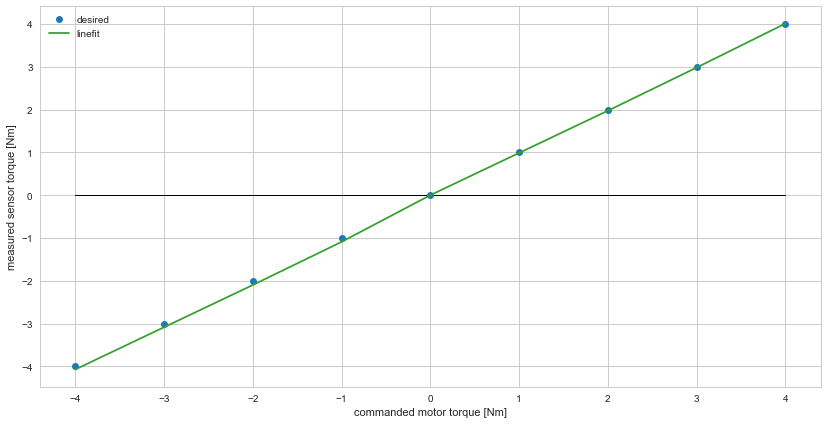

In [3]:
colors = sns.color_palette('Paired', 10)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(data[:, 0], data[:, 0], color=colors[1], marker='o', linestyle=' ', label='desired')
ax.plot(data[:, 0], -(data[:, 1] - 2042)*43/(2**11), color=colors[3], label='linefit')
ax.plot(data[:, 0], 0*data[:, 0], color='black', linewidth=1, zorder=1)

ax.set_xlabel('commanded motor torque [Nm]')
ax.set_ylabel('measured sensor torque [Nm]')
ax.legend()
plt.show()

y = -p1/(2**11)(x - p0)
2046 43.2969361074
2042 42.9314254575


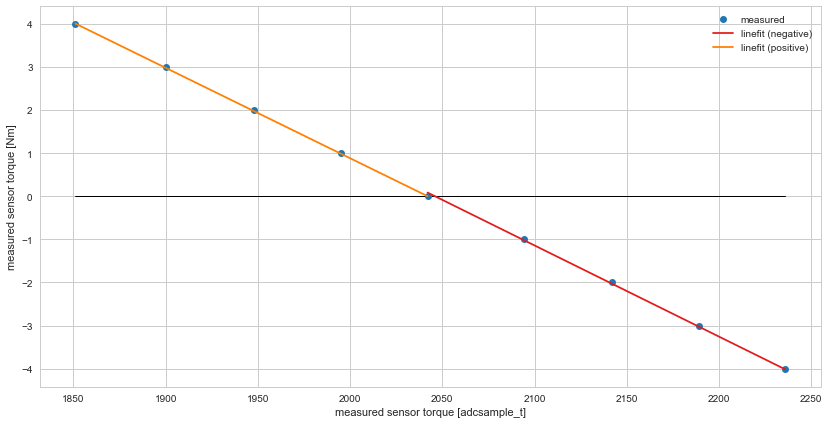

In [5]:
print('y = -p1/(2**11)(x - p0)')
p_neg = np.polyfit(data[:4, 1], data[:4, 0], 1)
pn0 = int(-p_neg[1]/p_neg[0])
pn1 = -p_neg[0] * 2**11
print(pn0, pn1)

p_pos = np.polyfit(data[4:, 1], data[4:, 0], 1)
pp0 = int(-p_pos[1]/p_pos[0])
pp1 = -p_pos[0] * 2**11
print(pp0, pp1)

colors = sns.color_palette('Paired', 10)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(data[:, 1], data[:, 0], color=colors[1], marker='o', linestyle=' ', label='measured')
ax.plot(data[:5, 1], -pn1/2**11*(data[:5, 1] - pn0), color=colors[5], label='linefit (negative)')
ax.plot(data[4:, 1], -pp1/2**11*(data[4:, 1] - pp0), color=colors[7], label='linefit (positive)')
ax.plot(data[:, 1], 0*data[:, 0], color='black', linewidth=1, zorder=1)

ax.set_xlabel('measured sensor torque [adcsample_t]')
ax.set_ylabel('measured sensor torque [Nm]')
ax.legend()
plt.show()